
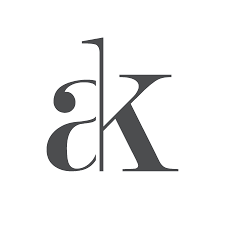
# Exploratory Data Analysis using Python(Part 01) 


**SET THE WORKING DIRECTORY SO THAT WE DO NOT HAVE TO THINK ABOUT PATH PROBLEMS**

Please ensure all your folder names <font color='red'><b>do not have a space & use forward slash (/)</b></font>

In [1]:
your_local_path="C:/Users/aayus/Desktop/Data Science/Data_Science_Foundation(October)/Week-6(Hypothesis Testing and EDA)/"

**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a crucial step of the data analytics process. It involves exploring the data and identifying important features about the data as well as asking interesting questions from the data by using statistical and visualization tools studied in earlier classes such as descriptive statistics and basic plotting. Entire aim of exploratory data analysis is to be able to get familiar with the data, perform data munging and manipulation, and ask questions before trying to forecast and run Machine Learning models on the data.

Dataset: In the first example, the dataset that we consider is data on countries and their territories. Specifically, we would using data files for TB Deaths, spread of TB, and number of new cases of TB to answer some important questions. 

In any data analysis process, there is one or more questions we want to answer. That is the most basic and important step in the whole process, to define these questions. Since we are going to perform some Exploratory Data Analysis in our TB dataset, these are the questions we want to answer:

<p>Which are the countries with the highest and infectious TB incidence?</p>
<p>What is the general world tendency in the period from 1990 to 2007?</p>
<p>What countries don't follow that tendency?</p>
<p>What other facts about the disease do we know that we can check with our data?</p>

In [2]:
import urllib.request

tb_deaths_url_csv = 'https://docs.google.com/spreadsheets/d/12uWVH_IlmzJX_75bJ3IH5E-Gqx6-zfbDKNvZqYjUuso/pub?gid=0&output=CSV'
tb_existing_url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
tb_new_url_csv = 'https://docs.google.com/spreadsheets/d/1Pl51PcEGlO9Hp4Uh0x2_QM0xVb53p2UDBMPwcnSjFTk/pub?gid=0&output=csv'

local_tb_deaths_file = your_local_path+'tb_deaths_100.csv'
local_tb_existing_file = your_local_path+'tb_existing_100.csv'
local_tb_new_file = your_local_path+'tb_new_100.csv'

#Copy the network objects denoted by URLs to local files
urllib.request.urlretrieve(tb_deaths_url_csv, local_tb_deaths_file)
urllib.request.urlretrieve(tb_existing_url_csv, local_tb_existing_file)
urllib.request.urlretrieve(tb_new_url_csv, local_tb_new_file)


('C:/Users/aayus/Desktop/Data Science/Data_Science_Foundation(October)/Week-6(Hypothesis Testing and EDA)/tb_new_100.csv',
 <http.client.HTTPMessage at 0x1a3229d4c88>)

In [3]:
import pandas as pd
import numpy as np

#tb_deaths_file = your_local_path+'tb_deaths_100.csv'
#tb_existing_file = your_local_path+'tb_existing_100.csv'
#tb_new_file = your_local_path+'tb_new_100.csv'

In [6]:
#Reading in deaths dataset
deaths_df = pd.read_csv(local_tb_deaths_file, index_col = 0, thousands=',').T
deaths_df.head()

"TB mortality, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,50,4,2,5,4,60,4,2,8,5,...,3,10,31,5,33,15,6,18,126,140
1991,49,4,2,2,4,60,4,2,8,5,...,3,9,30,5,33,40,5,17,153,161
1992,48,4,2,0,4,61,4,2,7,5,...,3,9,28,5,32,7,5,18,182,176
1993,47,4,2,2,4,62,4,2,7,6,...,3,11,27,5,32,19,5,17,203,193
1994,47,4,2,2,3,63,4,1,7,7,...,3,11,25,5,32,19,5,17,218,208


In [8]:
#Existing TB cases
existing_df = pd.read_csv(local_tb_existing_file, index_col = 0, thousands=',').T
existing_df.head()

"TB prevalence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,4,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426


In [9]:
#New tb cases
new_df = pd.read_csv(local_tb_new_file, index_col = 0, thousands=',').T
new_df.head()

"TB incidence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,168.0,25.0,38.0,21.0,36.0,205.0,24.0,10.0,60.0,33.0,...,28.0,68.0,139.0,35.0,202.0,63.0,35.0,133.0,297.0,329.0
1991,168.0,24.0,38.0,7.0,34.0,209.0,24.0,10.0,57.0,32.0,...,27.0,64.0,134.0,35.0,200.0,176.0,34.0,131.0,349.0,364.0
1992,168.0,25.0,39.0,2.0,32.0,214.0,24.0,9.0,55.0,33.0,...,27.0,63.0,130.0,35.0,198.0,32.0,34.0,132.0,411.0,389.0
1993,168.0,26.0,40.0,9.0,30.0,218.0,24.0,9.0,53.0,37.0,...,27.0,73.0,125.0,35.0,196.0,87.0,33.0,127.0,460.0,417.0
1994,168.0,26.0,41.0,9.0,29.0,222.0,23.0,8.0,51.0,41.0,...,26.0,73.0,121.0,35.0,195.0,86.0,33.0,125.0,501.0,444.0


In [11]:
#Checking shape of each dataset

print(new_df.shape,"\n",existing_df.shape,"\n",deaths_df.shape)

(18, 208) 
 (18, 207) 
 (18, 207)


In [12]:
#First step that we always do in EDA is that we examine the data (first few row to understand what kind of data we are dealing with)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df_summary = existing_df.describe()
df_summary

"TB prevalence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Rep.",Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Cote d'Ivoire,"Korea, Dem. Rep.","Congo, Dem. Rep.",Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Monaco,Mongolia,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,"Korea, Rep.",Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,"Macedonia, FYR",Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,Tanzania,Virgin Islands (U.S.),United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18

In [13]:
#In order to access individual columns
df_summary[['Spain','United Kingdom']]
#What can you infer from the data above

"TB prevalence, all forms (per 100 000 population per year)",Spain,United Kingdom
count,18.000000,18.000000
mean,30.666667,9.611111
std,6.677442,0.916444
min,23.000000,9.000000
25%,25.250000,9.000000
50%,29.000000,9.000000
75%,34.750000,10.000000
max,44.000000,12.000000


In [14]:
#If you want to check percentage change in exsiting cases over the years
tb_pct_change = existing_df.pct_change() #Percentage change between the current and a prior element.
tb_pct_change

"TB prevalence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Rep.",Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Cote d'Ivoire,"Korea, Dem. Rep.","Congo, Dem. Rep.",Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Monaco,Mongolia,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,"Korea, Rep.",Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,"Macedonia, FYR",Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,Tanzania,Virgin Islands (U.S.),United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,-0.016055,-0.047619,-0.022222,-0.666667,-0.051282,0.000000,0.000000,-0.062500,-0.052083,-0.057692,0.000000,-0.055556,-0.051724,-0.018519,-0.058333,-0.025039,0.000000,-0.129032,-0.062500,-0.015385,-0.014286,0.000000,-0.067100,-0.039788,-0.025000,0.031977,-0.040323,-0.062500,0.000000,0.116279,0.094972,0.048611,-0.024784,0.058511,0.000000,-0.024499,0.000000,0.056604,0.083665,-0.088889,-0.018349,-0.034091,-0.058511,0.062201,inf,-0.066667,-0.023810,-0.093750,-0.071429,0.000000,0.041096,-0.015458,0.112727,0.000000,-0.005387,0.000000,-0.054645,-0.039007,-0.020833,-0.052632,0.071006,0.000000,0.000000,0.080128,-0.044118,-0.142857,-0.047619,-0.179104,-0.052925,0.000000,-0.058824,0.000000,-0.026266,-0.033333,0.000000,-0.019417,-0.017699,0.029046,-0.002475,0.102564,-0.031315,-0.056738,0.014925,-0.200000,-0.015358,-0.029345,0.020000,0.000000,-0.052632,-0.090909,-0.090909,0.000000,-0.032258,-0.052632,-0.084211,-0.040000,-0.019493,-0.056180,0.033333,-0.009346

In [15]:
#Let us look at curious case of Spain. What do you infer?
tb_pct_change_spain = existing_df.Spain.pct_change()
tb_pct_change_spain

1990         NaN
1991   -0.045455
1992   -0.047619
1993   -0.075000
1994   -0.054054
1995   -0.028571
1996   -0.029412
1997   -0.090909
1998    0.000000
1999   -0.066667
2000   -0.035714
2001   -0.037037
2002    0.000000
2003   -0.038462
2004   -0.040000
2005    0.000000
2006    0.000000
2007   -0.041667
Name: Spain, dtype: float64

In [19]:
# tb_pct_change_spain.argmin()
#argmin is depreciated
tb_pct_change_spain.idxmin()
#index where value was minimum

'1997'

In [21]:
existing_df['United Kingdom'].pct_change().max()
#maximum percent change

0.11111111111111116

In [24]:
existing_df['United Kingdom'].pct_change().idxmax()

'1992'

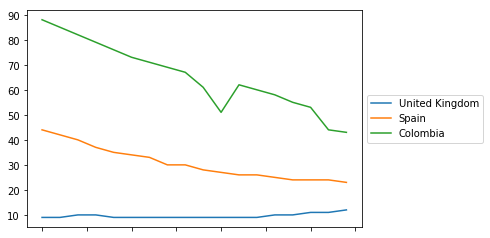

In [25]:
#Let us go ahead and do some plotting
%matplotlib inline
existing_df[['United Kingdom', 'Spain', 'Colombia']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))


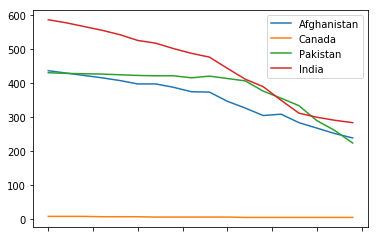

In [28]:
#Let us go ahead and do some plotting
%matplotlib inline
existing_df[['Afghanistan', 'Canada', 'Pakistan','India']].plot().legend()


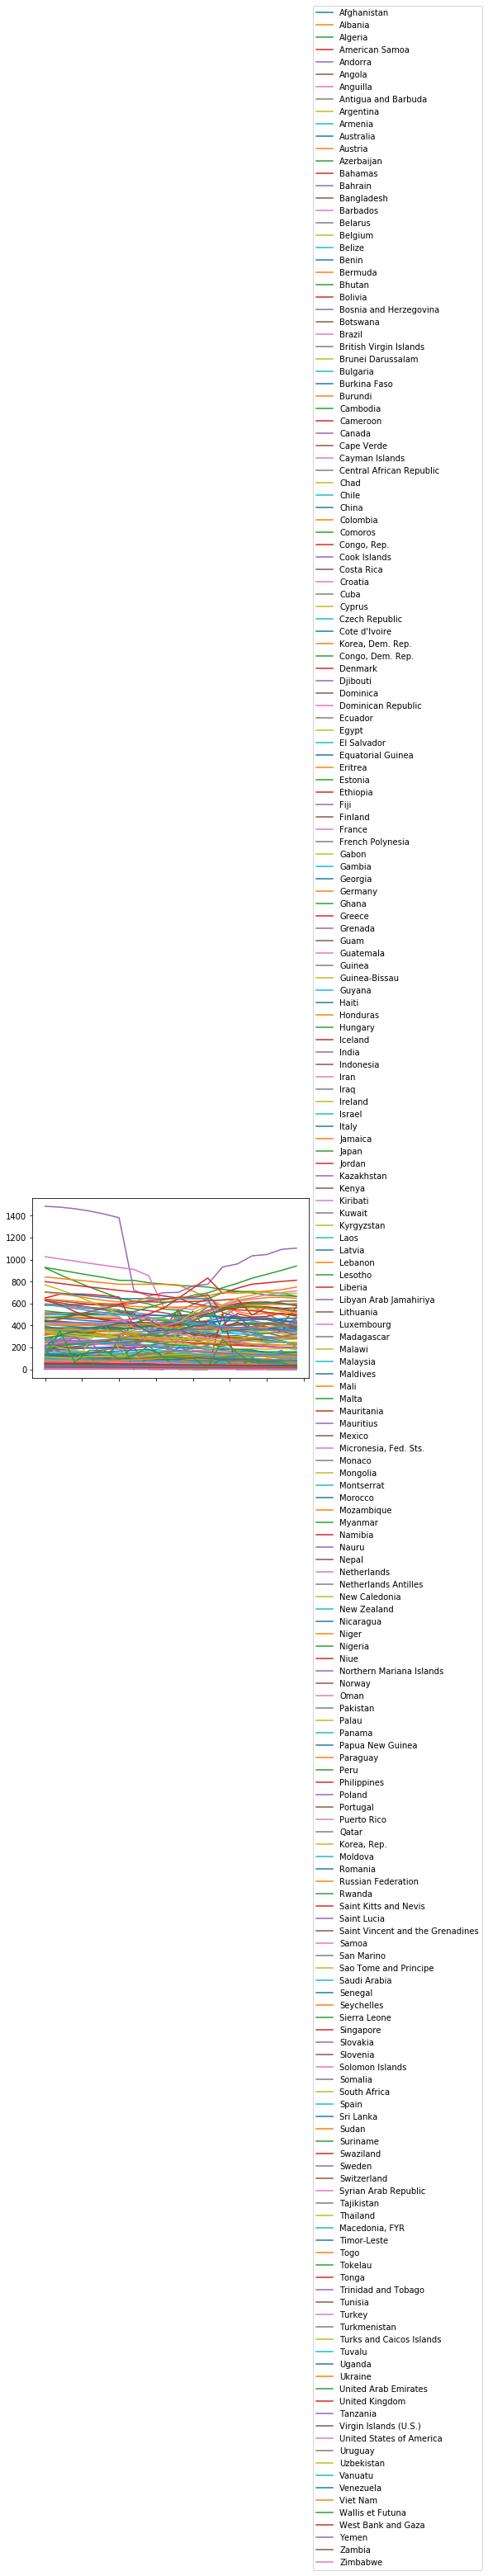

In [30]:
#Let us go ahead and do some plotting
%matplotlib inline
existing_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

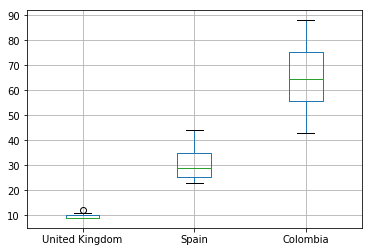

In [31]:
#How about box-plots
existing_df[['United Kingdom', 'Spain', 'Colombia']].boxplot()


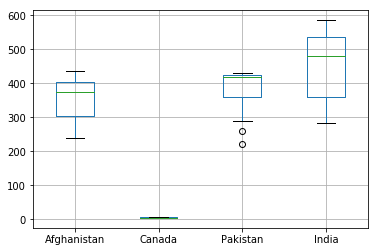

In [32]:
existing_df[['Afghanistan', 'Canada', 'Pakistan','India']].boxplot()

In [40]:
#Now let us ask some questions to the data
#Which country has the highest number of existing and new TB cases.
# print (existing_df.head())
esi=existing_df.apply(pd.Series.idxmax, axis=1)
esi.head()
# print(esi['2007'])

1990    Djibouti
1991    Djibouti
1992    Djibouti
1993    Djibouti
1994    Djibouti
dtype: object

In [43]:
#The highest number of existing and new TB cases each country has
esp=existing_df.apply(pd.Series.idxmax, axis=0)
# print(esp)
print (existing_df.apply(pd.Series.argmax, axis=1)) #In each year, which country has the highest number of existing cases

1990            Djibouti
1991            Djibouti
1992            Djibouti
1993            Djibouti
1994            Djibouti
1995            Djibouti
1996            Kiribati
1997            Kiribati
1998            Cambodia
1999    Korea, Dem. Rep.
2000            Djibouti
2001           Swaziland
2002            Djibouti
2003            Djibouti
2004            Djibouti
2005            Djibouti
2006            Djibouti
2007            Djibouti
dtype: object


C:\Users\aayus\Anaconda3\lib\site-packages\pandas\core\apply.py:242: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  labels=labels)


In [44]:
print (existing_df.apply(pd.Series.argmax, axis=0)) #For every country, which year registered the highest number of existing cases

TB prevalence, all forms (per 100 000 population per year)
Afghanistan                         1990
Albania                             1997
Algeria                             2007
American Samoa                      1990
Andorra                             1990
Angola                              2000
Anguilla                            1990
Antigua and Barbuda                 1990
Argentina                           1990
Armenia                             2001
Australia                           1990
Austria                             1990
Azerbaijan                          2001
Bahamas                             1998
Bahrain                             1990
Bangladesh                          1990
Barbados                            1990
Belarus                             1999
Belgium                             1990
Belize                              1990
Benin                               1990
Bermuda                             1990
Bhutan                              199

C:\Users\aayus\Anaconda3\lib\site-packages\pandas\core\apply.py:242: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  labels=labels)


In [45]:
print ("This is how the new TB cases are shaping up")
print (new_df.apply(pd.Series.argmax, axis=1))

This is how the new TB cases are shaping up
1990     Cambodia
1991     Djibouti
1992     Djibouti
1993     Djibouti
1994     Djibouti
1995     Djibouti
1996     Djibouti
1997     Djibouti
1998     Djibouti
1999     Djibouti
2000    Swaziland
2001    Swaziland
2002    Swaziland
2003    Swaziland
2004    Swaziland
2005    Swaziland
2006    Swaziland
2007    Swaziland
dtype: object


C:\Users\aayus\Anaconda3\lib\site-packages\pandas\core\apply.py:242: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  labels=labels)


In [46]:
print (new_df.apply(pd.Series.argmax, axis=0))

TB incidence, all forms (per 100 000 population per year)
Afghanistan                         1990
Albania                             1997
Algeria                             2007
American Samoa                      1990
Andorra                             1990
Angola                              2007
Anguilla                            1990
Antigua and Barbuda                 1990
Argentina                           1990
Armenia                             2001
Australia                           1990
Austria                             1990
Azerbaijan                          2001
Bahamas                             1990
Bahrain                             1990
Bangladesh                          1990
Barbados                            1990
Belarus                             1999
Belgium                             1990
Belize                              1990
Benin                               2007
Bermuda                             1990
Bhutan                              1990

C:\Users\aayus\Anaconda3\lib\site-packages\pandas\core\apply.py:242: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  labels=labels)


In [50]:
#What about world trends? 
#What is following code doing?
deaths_df.head()

"TB mortality, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Rep.",Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Cote d'Ivoire,"Korea, Dem. Rep.","Congo, Dem. Rep.",Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Monaco,Mongolia,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,"Korea, Rep.",Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,"Macedonia, FYR",Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,Tanzania,Virgin Islands (U.S.),United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,50,4,2,5,4,60,4,2,8,5,1,2,5,11,9,77,1,5,2,8,15,1,101,45,15,46,7,4,10,4,32,43,119,24,1,50,1,47,31,4,25,9,15,44,0,3,12,3,1,2,48,113,35,2,126,3,27,41,4,15,19,20,4,40,9,2,3,7,46,38,7,2,59,4,1,11,13,28,40,6,81,17,6,1,42,92,4,12,2,1,2,1,6,1,8,25,116,5,8,38,4,5,28,57,5,4,2,38,62,21,7,74,1,63,5,11,33,0,48,2,13,37,52,84,19,51,1,3,10,1,18,36,35,13,13,1,2,49,12,7,68,12,34,87,8,7,2,6,19,9,8,7,67,2,3,5,5,1,38,5,42,9,53,6,7,5,70,86,78,6,10,62,14,79,1,2,6,20,30,11,73,88,33,6,2,3,8,9,5,62,69,6,3,1,42,3,1,3,10,31,5,33,15,6,18,126,140
1991,49,4,2,2,4,60,4,2,8,5,1,2,5,11,8,75,1,4,2,9,15,1,95,43,15,51,7,3,10,4,35,49,119,28,1,48,1,53,34,4,24,9,14,49,2,3,12,3,1,2,56,113,39,1,127,3,27,40,4,14,22,20,4,45,8,2,3,6,45,38,6,2,58,4,1,10,13,29,40,7,82,16,6,1,42,89,4,12,2,1,1,1,6,1,7,27,111,5,8,37,5,5,31,59,5,5,2,38,73,21,7,74,1,63,5,10,31,0,47,2,13,42,53,96,32,49,1,3,10,1,17,36,40,13,17,1,2,49,8,7,67,12,32,86,8,6,2,6,16,8,9,7,73,2,3,5,4,1,37,4,42,8,57,6,7,5,66,85,78,6,10,63,13,83,1,2,5,17,31,11,72,91,33,6,2,3,8,9,5,59,106,5,3,1,48,3,1,3,9,30,5,33,40,5,17,153,161
1992,48,4,2,0,4,61,4,2,7,5,1,2,5,11,8,72,1,5,2,9,15,1,90,42,15,55,7,3,10,5,37,56,120,31,1,47,1,58,37,4,24,9,13,52,10,3,12,3,1,2,61,112,41,1,129,3,26,38,4,14,23,21,5,50,8,1,2,9,46,38,7,2,58,4,1,10,13,30,41,6,83,16,6,0,42,85,5,12,2,1,1,1,5,1,7,33,107,5,8,36,5,5,34,61,5,5,2,38,85,20,6,74,1,63,4,10,29,0,47,2,13,46,53,107,30,48,1,2,10,1,16,36,43,12,26,1,2,49,5,7,66,12,31,84,8,6,2,6,15,9,10,7,76,2,3,5,4,1,36,4,42,8,60,6,7,5,61,84,82,5,10,64,10,86,1,2,5,12,31,11,72,94,33,6,2,3,8,9,4,56,115,6,3,1,53,3,1,3,9,28,5,32,7,5,18,182,176
1993,47,4,2,2,4,62,4,2,7,6,1,2,6,11,7,70,1,5,2,9,15,1,85,41,15,58,7,3,10,5,39,61,120,34,1,46,1,64,40,3,23,9,12,55,8,3,12,2,1,2,67,112,44,1,132,3,26,37,4,13,25,21,5,55,7,1,2,9,47,38,7,2,59,4,1,11,13,32,42,8,84,15,6,1

In [51]:
deaths_total_per_year_df = deaths_df.sum(axis=1)
existing_total_per_year_df = existing_df.sum(axis=1)
new_total_per_year_df = new_df.sum(axis=1)

In [57]:
deaths_total_per_year_df.tail()

2003    6087
2004    6042
2005    6051
2006    5943
2007    6007
dtype: int64

In [56]:
existing_total_per_year_df.tail()

2003    36516
2004    36002
2005    35435
2006    34987
2007    34622
dtype: int64

In [55]:
new_total_per_year_df.tail()

2003    28192.0
2004    28352.0
2005    28219.0
2006    27999.0
2007    27611.0
dtype: float64

In [58]:
print(deaths_total_per_year_df,existing_total_per_year_df)

1990    4938
1991    5108
1992    5194
1993    5372
1994    5471
1995    5655
1996    5502
1997    5658
1998    5666
1999    6074
2000    6019
2001    6198
2002    6074
2003    6087
2004    6042
2005    6051
2006    5943
2007    6007
dtype: int64 1990    40772
1991    40669
1992    39912
1993    39573
1994    39066
1995    38904
1996    37032
1997    37462
1998    36871
1999    37358
2000    36747
2001    36804
2002    37160
2003    36516
2004    36002
2005    35435
2006    34987
2007    34622
dtype: int64


In [66]:
world_trends_df = pd.DataFrame({
           'Total deaths per 100K' : deaths_total_per_year_df, 
           'Total existing cases per 100K' : existing_total_per_year_df, 
           'Total new cases per 100K' : new_total_per_year_df}, 
       index=deaths_total_per_year_df.index)

world_trends_df.tail()

,Total deaths per 100K,Total existing cases per 100K,Total new cases per 100K
2003,6087,36516,28192.0
2004,6042,36002,28352.0
2005,6051,35435,28219.0
2006,5943,34987,27999.0
2007,6007,34622,27611.0


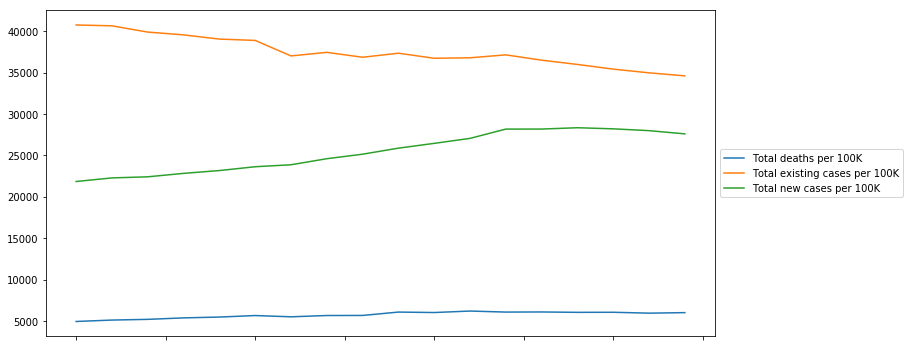

In [67]:
world_trends_df.plot(figsize=(12,6)).legend(
   loc='center left', 
   bbox_to_anchor=(1, 0.5))

#What inferences can we derive?

In [68]:
#What about specific countries?
deaths_by_country_mean = deaths_df.mean()
# print (deaths_by_country_mean)
#top 5 countries
print("deaths_by_country_mean")
print(deaths_by_country_mean.sort_values(ascending=False)[0:5])

deaths_by_country_mean
TB mortality, all forms (per 100 000 population per year)
Swaziland       222.166667
Zimbabwe        210.611111
Zambia          191.388889
South Africa    159.611111
Djibouti        123.166667
dtype: float64


In [73]:
deaths_by_country_mean_summary = deaths_by_country_mean.describe()
print (deaths_by_country_mean_summary)
print()
print()
print("existing_by_country_mean_summary")
existing_by_country_mean = existing_df.mean()
existing_by_country_mean_summary = existing_by_country_mean.describe()
print()
print()
print(existing_by_country_mean.sort_values(ascending=False)[0:5])
print (existing_by_country_mean_summary)
print("new_by_country_mean_summary")
print()
print()
new_by_country_mean = new_df.mean()
new_by_country_mean_summary = new_by_country_mean.describe()
print(new_by_country_mean.sort_values(ascending=False)[0:5])
print (new_by_country_mean_summary)

count    207.000000
mean      27.659420
std       38.687307
min        0.000000
25%        2.972222
50%        9.666667
75%       41.333333
max      222.166667
dtype: float64


existing_by_country_mean_summary


TB prevalence, all forms (per 100 000 population per year)
Djibouti            1064.166667
Cambodia             778.611111
Kiribati             702.888889
Korea, Dem. Rep.     686.611111
Togo                 672.833333
dtype: float64
count     207.000000
mean      181.398819
std       200.832983
min         2.444444
25%        30.861111
50%        85.611111
75%       333.555556
max      1064.166667
dtype: float64
new_by_country_mean_summary


TB incidence, all forms (per 100 000 population per year)
Djibouti     691.444444
Swaziland    679.555556
Zimbabwe     608.222222
Namibia      596.222222
Botswana     568.777778
dtype: float64
count    208.000000
mean     122.422543
std      142.348002
min        3.000000
25%       23.972222
50%       61.388889
75%      193.638889
max     

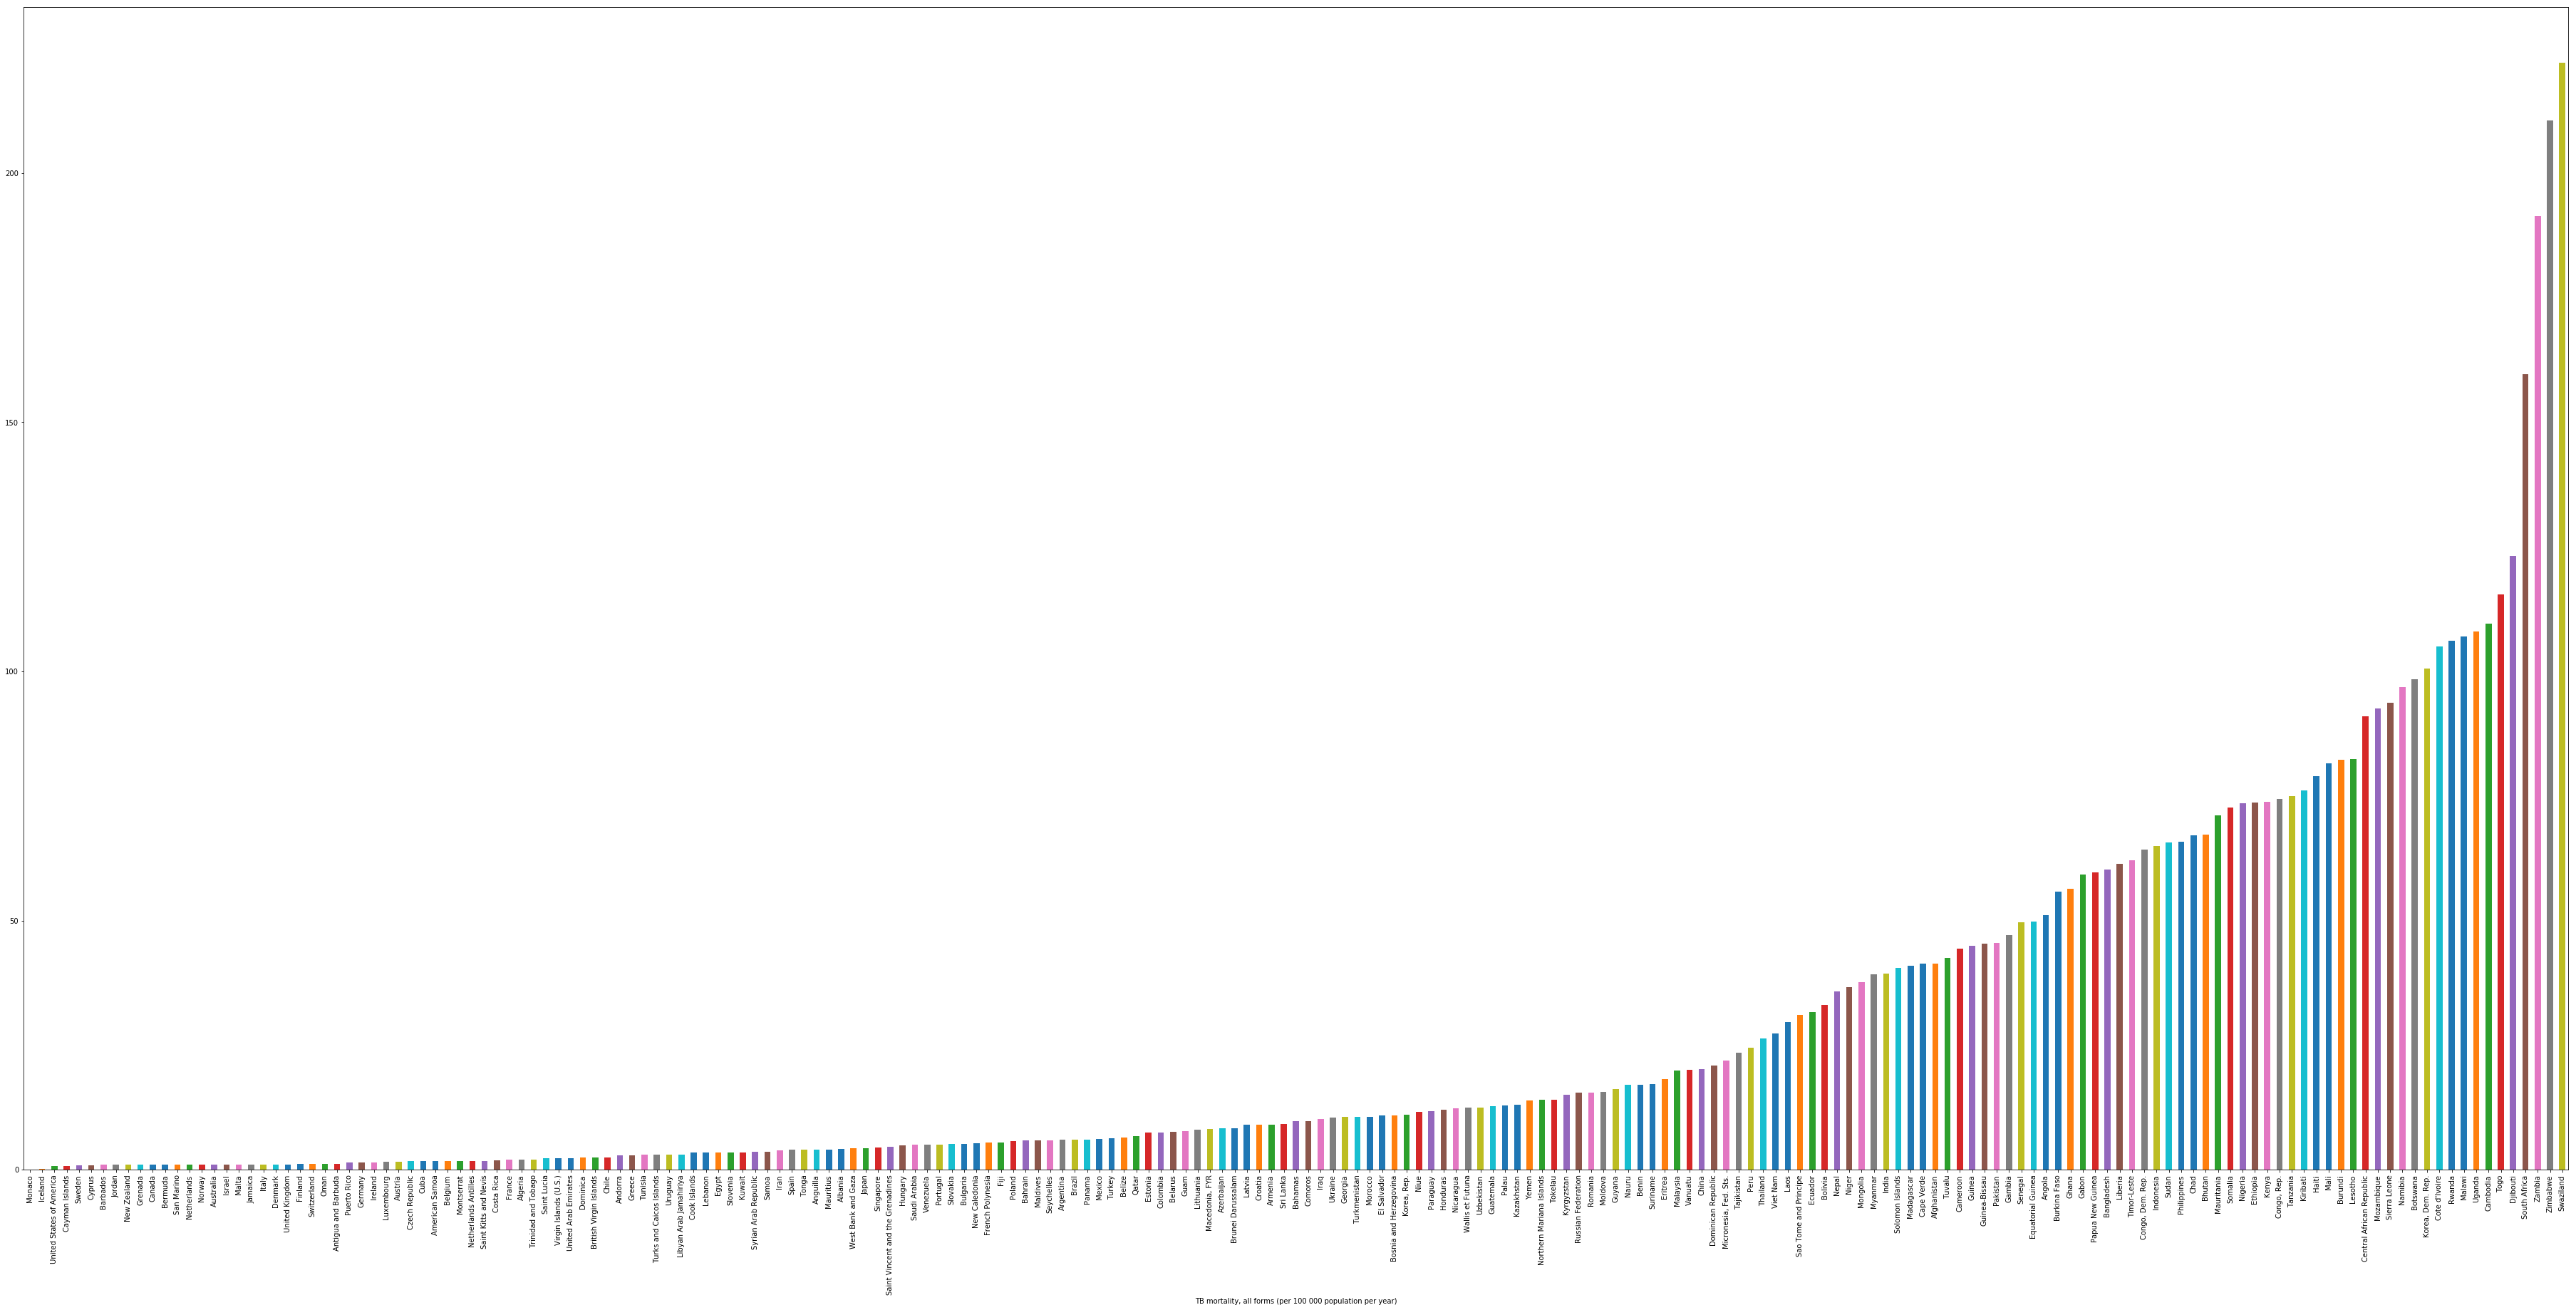

In [90]:
deaths_by_country_mean.sort_values().plot(kind='bar',figsize=(64,30))

In [93]:
deaths_by_country_mean_summary

count    207.000000
mean      27.659420
std       38.687307
min        0.000000
25%        2.972222
50%        9.666667
75%       41.333333
max      222.166667
dtype: float64

In [ ]:
#Let us think about outlier countries
deaths_outlier = deaths_by_country_mean_summary['50%']*1.5
existing_outlier = existing_by_country_mean_summary['50%']*1.5
new_outlier = new_by_country_mean_summary['50%']*1.5

outlier_countries_by_deaths_index = deaths_by_country_mean > deaths_outlier
outlier_countries_by_existing_index =  existing_by_country_mean > existing_outlier
outlier_countries_by_new_index = new_by_country_mean > new_outlier

# outlier_countries_by_deaths_index
# outlier_countries_by_existing_index
outlier_countries_by_new_index.size

In [94]:
#Most countries lies outside

#Proportions of countries as outliers
#deaths_df.T
num_countries = len(deaths_df.T)
#num_countries
print (num_countries)
sum(outlier_countries_by_deaths_index)
print (sum(outlier_countries_by_deaths_index))
print (sum(outlier_countries_by_existing_index))
print (sum(outlier_countries_by_new_index))

207
82
82
80


In [83]:
#What if you change outlier criteria?
outlier_countries_by_new_index

TB incidence, all forms (per 100 000 population per year)
Afghanistan                          True
Albania                             False
Algeria                             False
American Samoa                      False
Andorra                             False
Angola                               True
Anguilla                            False
Antigua and Barbuda                 False
Argentina                           False
Armenia                             False
Australia                           False
Austria                             False
Azerbaijan                          False
Bahamas                             False
Bahrain                             False
Bangladesh                           True
Barbados                            False
Belarus                             False
Belgium                             False
Belize                              False
Benin                               False
Bermuda                             False
Bhutan            

In [95]:
#Filter the data frame
outlier_deaths_df = deaths_df.T[ outlier_countries_by_deaths_index ].T
print (outlier_deaths_df)

TB mortality, all forms (per 100 000 population per year)  Afghanistan  \
1990                                                                50   
1991                                                                49   
1992                                                                48   
1993                                                                47   
1994                                                                47   
1995                                                                46   
1996                                                                46   
1997                                                                45   
1998                                                                43   
1999                                                                43   
2000                                                                41   
2001                                                                39   
2002                                  

In [96]:
outlier_existing_df = existing_df.T[ outlier_countries_by_existing_index ].T
outlier_new_df = new_df.T[ outlier_countries_by_new_index ].T

In [97]:
outlier_new_df

"TB incidence, all forms (per 100 000 population per year)",Afghanistan,Angola,Bangladesh,Bhutan,Bolivia,Botswana,Burkina Faso,Burundi,Cambodia,Cameroon,Cape Verde,Central African Republic,Chad,China,"Congo, Rep.",Cote d'Ivoire,"Korea, Dem. Rep.","Congo, Dem. Rep.",Djibouti,Ecuador,Equatorial Guinea,Ethiopia,Gabon,Gambia,Ghana,Guinea,Guinea-Bissau,Haiti,India,Indonesia,Kazakhstan,Kenya,Kiribati,Kyrgyzstan,Laos,Lesotho,Liberia,Madagascar,Malawi,Malaysia,Mali,Mauritania,"Micronesia, Fed. Sts.",Mongolia,Morocco,Mozambique,Myanmar,Namibia,Nepal,Niger,Nigeria,Northern Mariana Islands,Pakistan,Papua New Guinea,Peru,Philippines,"Korea, Rep.",Moldova,Romania,Rwanda,Sao Tome and Principe,Senegal,Sierra Leone,Solomon Islands,Somalia,South Africa,Sudan,Swaziland,Tajikistan,Thailand,Timor-Leste,Togo,Tuvalu,Uganda,Tanzania,Vanuatu,Viet Nam,Yemen,Zambia,Zimbabwe
1990,168.0,205.0,264.0,540.0,255.0,307.0,95.0,154.0,585.0,81.0,175.0,145.0,125.0,116.0,169.0,177.0,344.0,165.0,582.0,167.0,108.0,159.0,153.0,185.0,223.0,119.0,158.0,306.0,168.0,343.0,58.0,112.0,513.0,55.0,179.0,184.0,199.0,177.0,258.0,118.0,275.0,228.0,188.0,205.0,149.0,181.0,171.0,322.0,243.0,125.0,131.0,71.0,181.0,250.0,317.0,393.0,165.0,65.0,74.0,167.0,135.0,195.0,207.0,312.0,249.0,301.0,174.0,267.0,112.0,142.0,322.0,308.0,296.0,163.0,178.0,139.0,202.0,133.0,297.0,329.0
1991,168.0,209.0,261.0,516.0,247.0,341.0,105.0,171.0,579.0,89.0,174.0,161.0,139.0,115.0,188.0,196.0,344.0,182.0,594.0,162.0,119.0,176.0,150.0,189.0,222.0,126.0,161.0,306.0,168.0,335.0,54.0,114.0,503.0,58.0,177.0,201.0,203.0,181.0,286.0,117.0,277.0,232.0,181.0,205.0,145.0,201.0,171.0,357.0,238.0,127.0,145.0,101.0,181.0,250.0,301.0,386.0,145.0,62.0,79.0,185.0,133.0,198.0,220.0,296.0,249.0,301.0,178.0,266.0,95.0,142.0,322.0,314.0,287.0,250.0,196.0,134.0,200.0,131.0,349.0,364.0
1992,168.0,214.0,259.0,492.0,240.0,364.0,112.0,182.0,574.0,95.0,172.0,172.0,149.0,114.0,200.0,209.0,344.0,195.0,606.0,157.0,127.0,188.0,148.0,193.0,220.0,132.0,164.0,306.0,168.0,327.0,54.0,135.0,493.0,58.0,175.0,218.0,207.0,185.0,314.0,117.0,280.0,237.0,174.0,205.0,141.0,214.0,171.0,381.0,233.0,130.0,155.0,150.0,181.0,250.0,285.0,380.0,129.0,65.0,86.0,197.0,131.0,202.0,233.0,281.0,249.0,302.0,181.0,260.0,66.0,142.0,322.0,320.0,277.0,272.0,213.0,130.0,198.0,132.0,411.0,389.0
1993,168.0,218.0,256.0,470.0,233.0,390.0,120.0,196.0,568.0,102.0,171.0,184.0,159.0,113.0,215.0,224.0,344.0,209.0,618.0,153.0,136.0,201.0,151.0,196.0,219.0,139.0,167.0,306.0,168.0,319.0,54.0,160.0,483.0,59.0,173.0,244.0,211.0,189.0,343.0,116.0,282.0,241.0,168.0,205.0,137.0,230.0,171.0,409.0,229.0,133.0,166.0,97.0,181.0,250.0,270.0,373.0,112.0,71.0,96.0,212.0,129.0,206.0,248.0,267.0,249.0,305.0,185.0,267.0,47.0,142.0,322.0,326.0,268.0,296.0,229.0,125.0,196.0,127.0,460.0,417.0
1994,168.0,222.0,253.0,449.0,226.0,415.0,128.0,208.0,563.0,109.0,169.0,196.0,170.0,112.0,229.0,239.0,344.0,222.0,630.0,148.0,145.0,215.0,156.0,200.0,218.0,147.0,170.0,306.0,168.0,311.0,55.0,192.0,474.0,65.0,172.0,280.0,215.0,192.0,373.0,115.0,285.0,246.0,161.0,205.0,133.0,245.0,171.0,435.0,224.0,135.0,176.0,93.0,181.0,250.0,255.0,366.0,106.0,79.0,105.0,225.0,126.0,211.0,263.0,253.0,249.0,309.0,189.0,293.0,51.0,142.0,322.0,333.0,259.0,306.0,249.0,121.0,195.0,125.0,501.0,444.0
1995,168.0,226.0,251.0,428.0,220.0,444.0,137.0,223.0,557.0,116.0,168.0,209.0,181.0,111.0,245.0,255.0,344.0,238.0,642.0,144.0,155.0,229.0,151.0,204.0,217.0,154.0,174.0,306.0,168.0,304.0,62.0,224.0,464.0,77.0,170.0,323.0,219.0,196.0,390.0,114.0,287.0,251.0,155.0,205.0,129.0,262.0,171.0,465.0,220.0,138.0,188.0,92.0,181.0,250.0,242.0,360.0,98.0,91.0,112.0,241.0,124.0,215.0,279.0,240.0,249.0,317.0,192.0,337.0,65.0,142.0,322.0,339.0,250.0,319.0,271.0,117.0,193.0,122.0,536.0,474.0
1996,168.0,231.0,248.0,409.0,213.0,468.0,145.0,235.0,552.0,123.0,166.0,221.0,191.0,110.0,258.0,269.0,344.0,251.0,655.0,140.0,164.0,242.0,166.0,208.0,216.0,163.0,177.0,306.0,168.0,297.0,72.0,258.0,455.0,94.0,168.0,362.0,223.0,200.0,389.0,113.0,290.0,256.0,149.0,205.

In [98]:
outlier_new_df.shape

(18, 80)

In [99]:
#What do you infer from above dataset? Can we somehow combine all of that information?

average_outlier_country = outlier_new_df.mean(axis=1)
average_outlier_country

1990    211.9500
1991    217.2625
1992    221.2750
1993    224.8625
1994    229.8250
1995    235.6125
1996    241.0875
1997    249.2875
1998    257.5875
1999    266.6125
2000    277.3875
2001    287.0750
2002    296.1500
2003    302.3125
2004    304.4125
2005    303.0500
2006    300.4875
2007    298.0875
dtype: float64

In [100]:
#Compare this with rest of world
# print(outlier_countries_by_new_index)
#Here negative means the opposite
new_df.T[-outlier_countries_by_new_index].T.mean(axis=1)
avearge_better_world_country = new_df.T[ - outlier_countries_by_new_index ].T.mean(axis=1)
avearge_better_world_country

1990    38.574803
1991    38.637795
1992    37.157480
1993    38.165354
1994    37.724409
1995    37.716535
1996    36.149606
1997    36.732283
1998    35.803150
1999    35.866142
2000    33.645669
2001    32.275591
2002    35.401575
2003    31.551181
2004    31.488189
2005    31.054688
2006    30.937500
2007    29.637795
dtype: float64

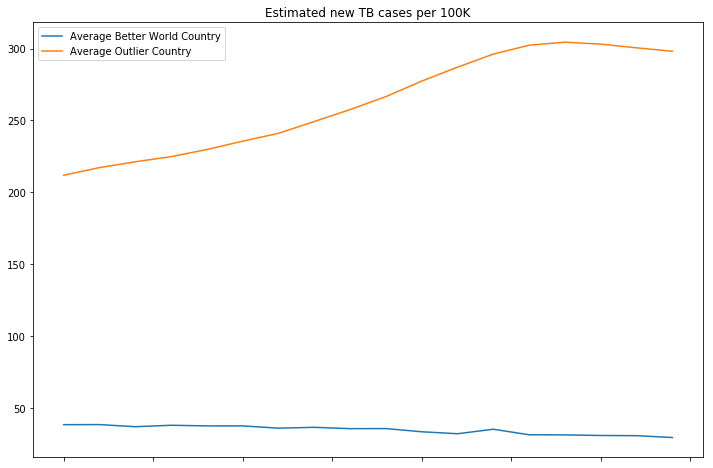

In [101]:
two_world_df = pd.DataFrame({ 
            'Average Better World Country': avearge_better_world_country,
            'Average Outlier Country' : average_outlier_country},
        index = new_df.index)
two_world_df.plot(title="Estimated new TB cases per 100K",figsize=(12,8))

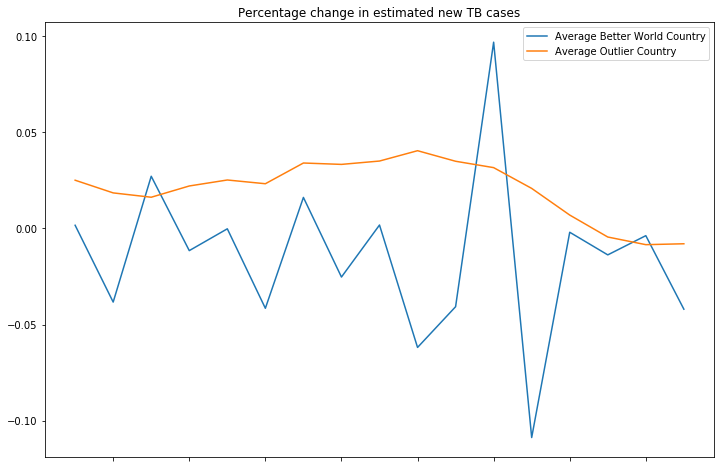

In [102]:
two_world_df.pct_change().plot(title="Percentage change in estimated new TB cases", figsize=(12,8))
#What do you infer here?

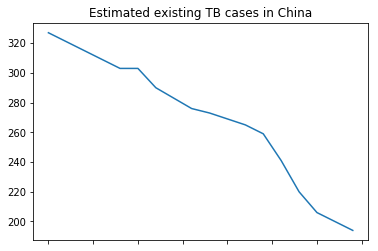

In [103]:
existing_df.China.plot(title="Estimated existing TB cases in China")


In [105]:
new_df.apply(pd.Series.idxmax, axis=1)['2007']


'Swaziland'